In [30]:
import __init__
from __init__ import DATA_PATH
from __init__ import PACKAGE_PATH
from dce import DCE
from cluster import Cluster
import utilities
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
from descriptor import mordredDescriptors as mDesc

(array([756.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 307.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

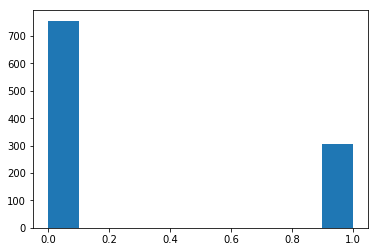

In [32]:
df = pd.read_csv(os.path.join(DATA_PATH,'BOD_RDKit_Descriptors_1063.csv'))
df['cleaned_bod'] = utilities.clean_out_of_bound(df['value (% BOD)'])

df['bi_class_partition'] = utilities.divide_classes(df['cleaned_bod'], [60])
true_label_biclass = df['bi_class_partition'].values
plt.hist(df['bi_class_partition'])

In [33]:
mdescriptor = mDesc.batch_compute_all_descriptors(df['SMILES'])

 42%|████▏     | 449/1063 [00:07<00:09, 63.38it/s]

/Users/hanghu/miniconda3/envs/deepchembed/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 48%|████▊     | 507/1063 [00:08<00:12, 43.48it/s]

/Users/hanghu/miniconda3/envs/deepchembed/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 60%|██████    | 640/1063 [00:11<00:24, 17.47it/s]

/Users/hanghu/miniconda3/envs/deepchembed/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 70%|██████▉   | 742/1063 [00:13<00:06, 50.28it/s]

/Users/hanghu/miniconda3/envs/deepchembed/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 78%|███████▊  | 832/1063 [00:15<00:07, 29.63it/s]

/Users/hanghu/miniconda3/envs/deepchembed/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/hanghu/miniconda3/envs/deepchembed/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 94%|█████████▍| 999/1063 [00:19<00:02, 30.60it/s]

/Users/hanghu/miniconda3/envs/deepchembed/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 1063/1063 [00:21<00:00, 49.86it/s]


In [5]:
len(mdescriptor.loc[0])

1613

### drop colums have NA values

In [34]:
for col in mdescriptor.columns:
    if len(pd.value_counts(mdescriptor[col].isna())) > 1:
        mdescriptor = mdescriptor.drop(col, axis=1)


In [35]:
len(mdescriptor.loc[0])

1183

In [36]:
pd.value_counts(mdescriptor.dtypes)

float64    872
int64      309
bool         2
dtype: int64

In [37]:
feat_int = mdescriptor.select_dtypes(include=['int64'])
selected_int_feat = feat_int.loc[:,feat_int.nunique()>1]
len(selected_int_feat.loc[0])

187

In [38]:
feat_float = mdescriptor.select_dtypes(include=['float64'])
selected_float_feat = feat_float.loc[:,feat_float.nunique()>1]
len(selected_float_feat.loc[0])

794

In [65]:
#from keras.utils import normalize
from sklearn.preprocessing import normalize
norm_int_train = normalize(selected_int_feat.values, axis=0, norm='max')
norm_float_train = normalize(selected_float_feat.values, axis=0, norm='max')

In [66]:
norm_float_train

array([[0.1947295 , 0.23191848, 0.21617207, ..., 0.20576923, 0.15954367,
        0.20217391],
       [0.05949716, 0.08401263, 0.06137144, ..., 0.04038462, 0.1035246 ,
        0.07536232],
       [0.22232359, 0.25095942, 0.23656676, ..., 0.21538462, 0.18678699,
        0.2115942 ],
       ...,
       [0.31440957, 0.3242829 , 0.35724332, ..., 0.29230769, 0.25472501,
        0.34057971],
       [0.27961798, 0.29740931, 0.32580141, ..., 0.26346154, 0.1634599 ,
        0.2826087 ],
       [0.11509676, 0.15291337, 0.1209935 , ..., 0.08846154, 0.15137068,
        0.13478261]])

### test on baseline model

In [67]:
from cluster import KMeans

In [68]:
kmeans_cluster = KMeans(n_clusters=2)
kmeans_cluster.build_model()
kmeans_cluster.train_model(norm_int_train, true_labels=true_label_biclass)

Metrics without ture labels
silhouette score: 0.30513180636232756
calinski score: 183.3050851950607

Metric with True label
adjusted rand score: -0.05612061545144463 
fowlkes_mallows : 0.5998191399915251


(array([0, 0, 1, ..., 1, 1, 0], dtype=int32),
 {'silhouette_score': 0.30513180636232756,
  'calinski_score': 183.3050851950607,
  'adjusted_rand_score': -0.05612061545144463,
  'fowlkes_mallows_score': 0.5998191399915251})

(array([828.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 235.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

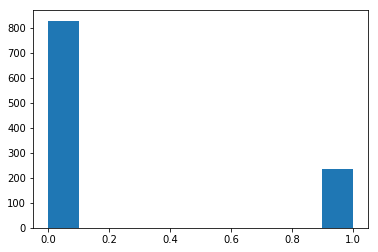

In [69]:
plt.hist(kmeans_cluster.model.labels_)

In [70]:
kmeans_cluster = KMeans(n_clusters=2)
kmeans_cluster.build_model()
kmeans_cluster.train_model(norm_float_train, true_labels=true_label_biclass)

Metrics without ture labels
silhouette score: 0.8983505007029924
calinski score: 1030.7298674227284

Metric with True label
adjusted rand score: -0.007630041900512598 
fowlkes_mallows : 0.7602353091572206


(array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 {'silhouette_score': 0.8983505007029924,
  'calinski_score': 1030.7298674227284,
  'adjusted_rand_score': -0.007630041900512598,
  'fowlkes_mallows_score': 0.7602353091572206})

(array([1056.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           7.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

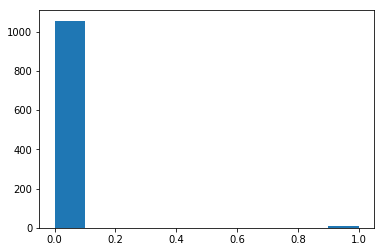

In [71]:
plt.hist(kmeans_cluster.model.labels_)

### test autoencoder

In [72]:
from dimreducer import DeepAutoEncoder as DAE

In [73]:
dims = [187, 90, 45]
autoencoder = DAE(dims)
autoencoder.build_model()
history = autoencoder.train_model(norm_int_train, norm_feature=False, epochs=50)

Epoch 1/50
1063/1063 [==============================] - 3s 3ms/step - loss: 0.0254
Epoch 2/50
1063/1063 [==============================] - 0s 22us/step - loss: 0.0139
Epoch 3/50
1063/1063 [==============================] - 0s 22us/step - loss: 0.0115
Epoch 4/50
1063/1063 [==============================] - 0s 24us/step - loss: 0.0104
Epoch 5/50
1063/1063 [==============================] - 0s 22us/step - loss: 0.0096
Epoch 6/50
1063/1063 [==============================] - 0s 23us/step - loss: 0.0089
Epoch 7/50
1063/1063 [==============================] - 0s 22us/step - loss: 0.0083
Epoch 8/50
1063/1063 [==============================] - 0s 23us/step - loss: 0.0077
Epoch 9/50
1063/1063 [==============================] - 0s 22us/step - loss: 0.0073
Epoch 10/50
1063/1063 [==============================] - 0s 23us/step - loss: 0.0069
Epoch 11/50
1063/1063 [==============================] - 0s 22us/step - loss: 0.0065
Epoch 12/50
1063/1063 [==============================] - 0s 22us/step - los

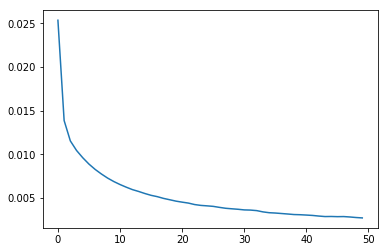

In [74]:
plt.plot(history.history['loss'])

In [75]:
dims = [794, 200, 50]
autoencoder = DAE(dims)
autoencoder.build_model()
history = autoencoder.train_model(norm_float_train, norm_feature=False, epochs=50)

Epoch 1/50
1063/1063 [==============================] - 3s 3ms/step - loss: 0.1561
Epoch 2/50
1063/1063 [==============================] - 0s 56us/step - loss: 0.1224
Epoch 3/50
1063/1063 [==============================] - 0s 53us/step - loss: 0.1025
Epoch 4/50
1063/1063 [==============================] - 0s 54us/step - loss: 0.0946
Epoch 5/50
1063/1063 [==============================] - 0s 54us/step - loss: 0.0891
Epoch 6/50
1063/1063 [==============================] - 0s 53us/step - loss: 0.0862
Epoch 7/50
1063/1063 [==============================] - 0s 54us/step - loss: 0.0842
Epoch 8/50
1063/1063 [==============================] - 0s 53us/step - loss: 0.0830
Epoch 9/50
1063/1063 [==============================] - 0s 57us/step - loss: 0.0821
Epoch 10/50
1063/1063 [==============================] - 0s 58us/step - loss: 0.0812
Epoch 11/50
1063/1063 [==============================] - 0s 56us/step - loss: 0.0810
Epoch 12/50
1063/1063 [==============================] - 0s 55us/step - los

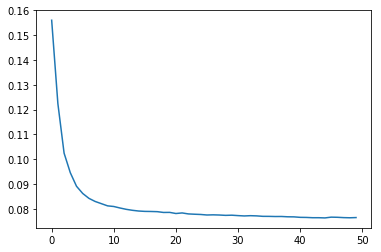

In [76]:
plt.plot(history.history['loss'])

### test dce


In [77]:
autoencoder_dims = [187, 90, 45]
dce = DCE(autoencoder_dims, n_clusters=2, update_interval=25)
cl_weights = np.arange(0.1, 1, 0.1)
results = []

for cl_weight in cl_weights:
    dce.build_model(norm=True)
    print('Start to train model with cluster weight: ' + str(cl_weight))
    result_i = dce.train_model(norm_int_train,clustering_loss='kld', 
                               decoder_loss='mse',
                               training_prints=False,
                               norm_feature=False,
                               clustering_loss_weight=cl_weight)
    results.append(result_i)
    print('Training finished and the results are recorded')

Start to train model with cluster weight: 0.1
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.2
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.30000000000000004
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.4
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.5
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.6
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.7000000000000001

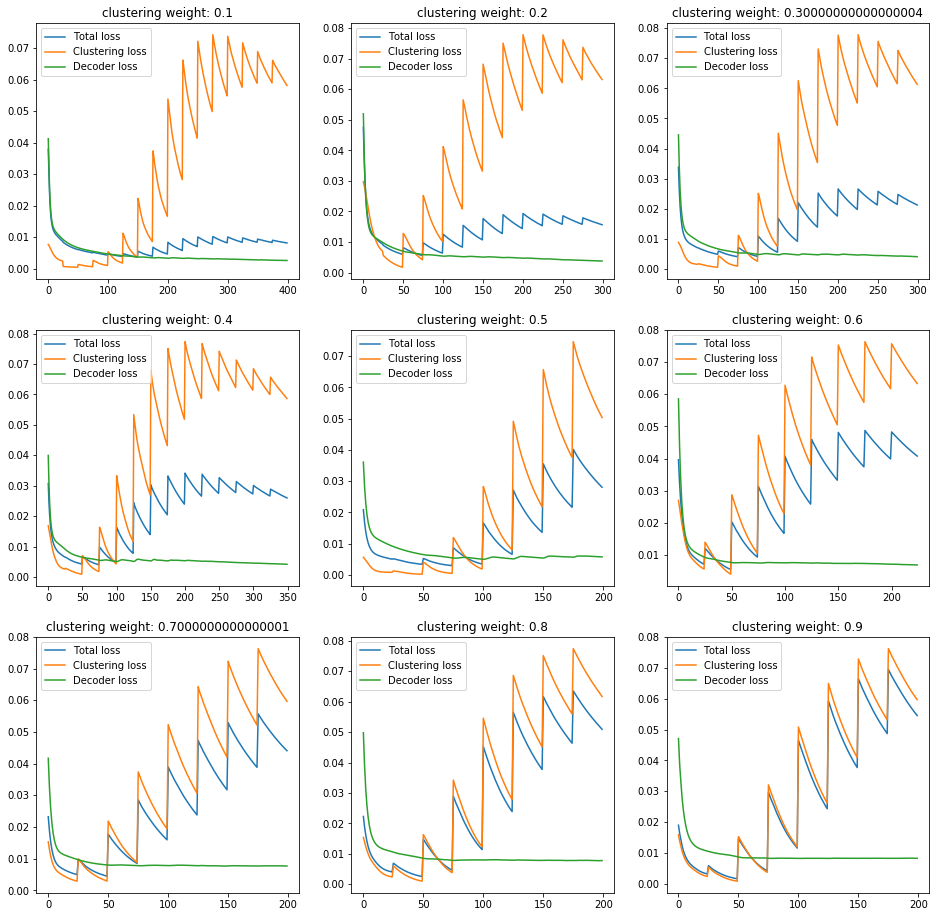

In [78]:
fig, ax =plt.subplots(3,3,figsize=(16,16))

for i in range(9):
    row_i = int(i/3)
    column_j = i % 3
    ax[row_i][column_j].plot(results[i][1][0],label='Total loss')
    ax[row_i][column_j].plot(results[i][1][1],label='Clustering loss')
    ax[row_i][column_j].plot(results[i][1][2],label='Decoder loss')
    ax[row_i][column_j].legend()
    ax[row_i][column_j].set_title('clustering weight: ' + str(cl_weights[i]))

Text(0.5, 1.0, 'fowlkes_mallows_score')

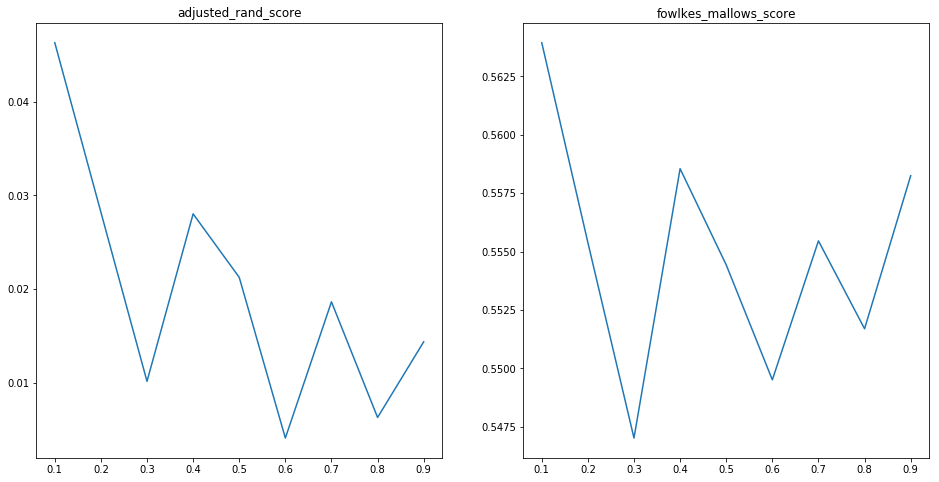

In [79]:
adjusted_rand_score = []
fowlkes_mallows_score = []
for i in range(9):
    metric_dict = Cluster.true_label_metrics(true_label_biclass,results[i][0],print_metric=False)
    adjusted_rand_score.append(metric_dict['adjusted_rand_score'])
    fowlkes_mallows_score.append(metric_dict['fowlkes_mallows_score'])

fig, ax =plt.subplots(1,2,figsize=(16,8))

ax[0].plot(cl_weights,adjusted_rand_score)
ax[0].set_title('adjusted_rand_score')

ax[1].plot(cl_weights,fowlkes_mallows_score)
ax[1].set_title('fowlkes_mallows_score')

In [80]:
autoencoder_dims = [794, 200, 50]
dce = DCE(autoencoder_dims, n_clusters=2, update_interval=25)
cl_weights = np.arange(0.1, 1, 0.1)
results = []

for cl_weight in cl_weights:
    dce.build_model(norm=True)
    print('Start to train model with cluster weight: ' + str(cl_weight))
    result_i = dce.train_model(norm_float_train,clustering_loss='kld', 
                               decoder_loss='mse',
                               training_prints=False,
                               norm_feature=False,
                               clustering_loss_weight=cl_weight)
    results.append(result_i)
    print('Training finished and the results are recorded')

Start to train model with cluster weight: 0.1
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.2
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.30000000000000004
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.4
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.5
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.6
0.0 < 0.0001
Reached tolerance threshold. Stopping training.
Training finished and the results are recorded
Start to train model with cluster weight: 0.7000000000000001

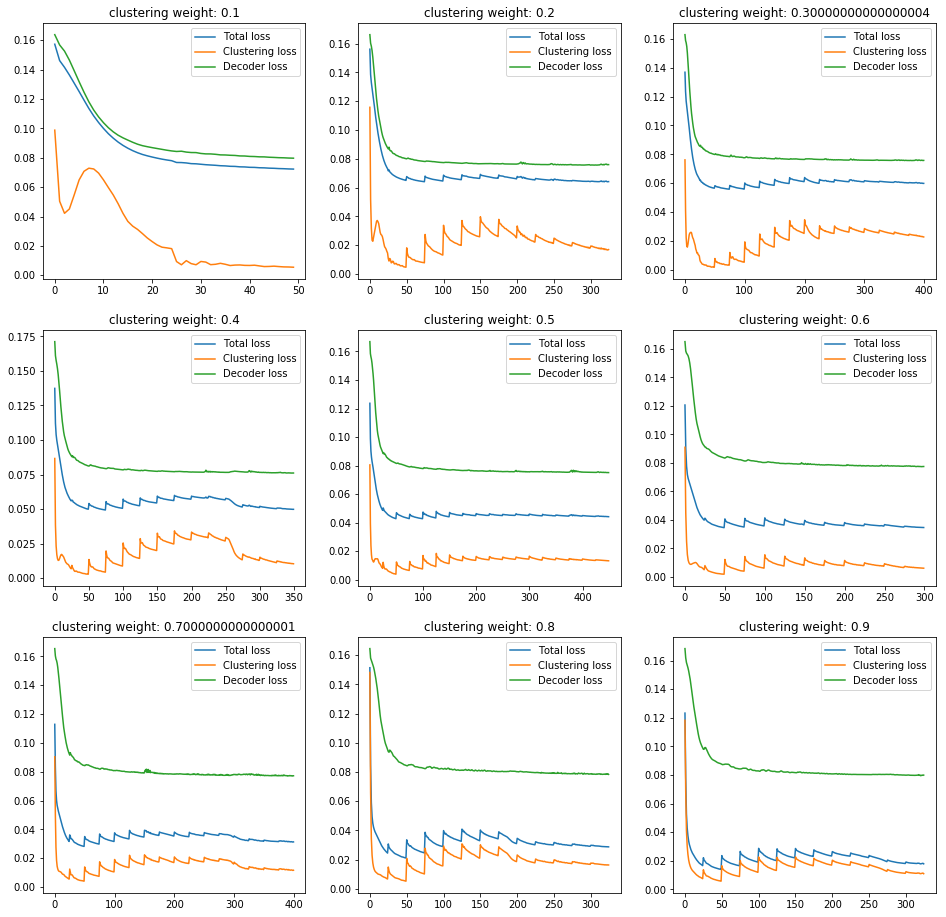

In [81]:
fig, ax =plt.subplots(3,3,figsize=(16,16))
for i in range(9):
    row_i = int(i/3)
    column_j = i % 3
    ax[row_i][column_j].plot(results[i][1][0],label='Total loss')
    ax[row_i][column_j].plot(results[i][1][1],label='Clustering loss')
    ax[row_i][column_j].plot(results[i][1][2],label='Decoder loss')
    ax[row_i][column_j].legend()
    ax[row_i][column_j].set_title('clustering weight: ' + str(cl_weights[i]))

Text(0.5, 1.0, 'fowlkes_mallows_score')

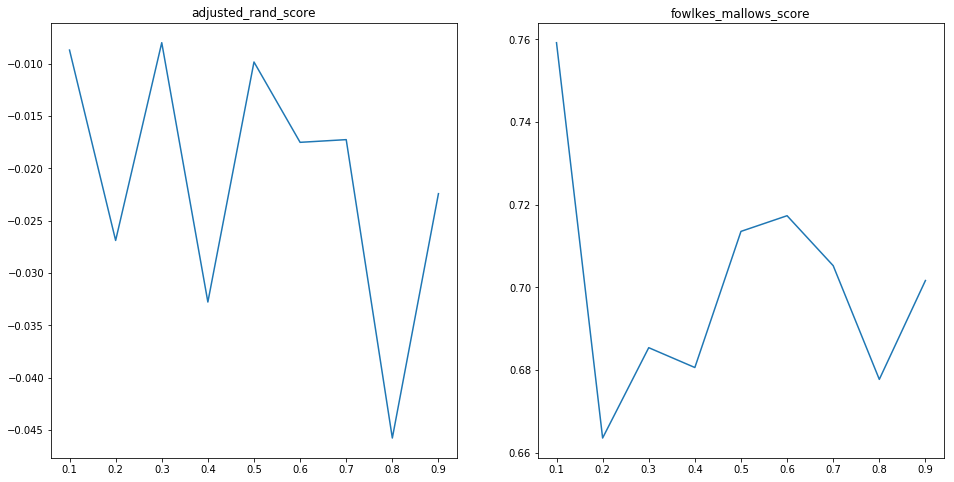

In [82]:
adjusted_rand_score = []
fowlkes_mallows_score = []
for i in range(9):
    metric_dict = Cluster.true_label_metrics(true_label_biclass,results[i][0],print_metric=False)
    adjusted_rand_score.append(metric_dict['adjusted_rand_score'])
    fowlkes_mallows_score.append(metric_dict['fowlkes_mallows_score'])

fig, ax =plt.subplots(1,2,figsize=(16,8))

ax[0].plot(cl_weights,adjusted_rand_score)
ax[0].set_title('adjusted_rand_score')

ax[1].plot(cl_weights,fowlkes_mallows_score)
ax[1].set_title('fowlkes_mallows_score')